Лабораторная работа № 5
Генерация и анализ коррелированных выборок
Задание:
1. Сгенерировать выборку X1 из нормального распределения. Параметры a1, S1,
задать произвольно. Объем выборки N = 200.
2. Задать значения двух коэффициентов корреляции, таких чтобы
r1 = [0.1;0.2] , r2 = [0.6;0.9].
3. Построить еще две выборки X2 и X3 так, чтобы одна из них имела
коэффициент корреляции с первой выборкой r1, а вторая соответственно
r2.

X2 = r1*X1 + sqrt(1 - r1^2) * rnorm(N,a2,S2)

X3 = r2*X1 + sqrt(1 - r2^2) * rnorm(N,a2,S2)

4. Построить диаграммы рассеяния для X1 и X2, X1 и X3.
5. Построить выборочные парные коэффициенты корреляции r1^, r2^ для X1 и X2, X1 и X3.
6. Рассчитать статистики Стьюдента по выборочным значениям r1^, r2^ и проверить гипотезу о наличии корреляционной связи.
7. Построить доверительный интервал для корреляционного
коэффициента с помощью Z-преобразования Фишера

Выборочные коэффициенты корреляции:
r1^ = 0.2593515 
r2^ = 0.7302031 

Статистики t-Стьюдента:
t1 = 3.778695 
t2 = 15.03866 
|t1|= 3.778695 ; t_critical =  1.972017 
|t2|= 15.03866 ; t_critical =  1.972017 

Доверительный интервал для r1^: 0.1257538 0.3837101 
Доверительный интервал для r2^: 0.6591761 0.7883167 


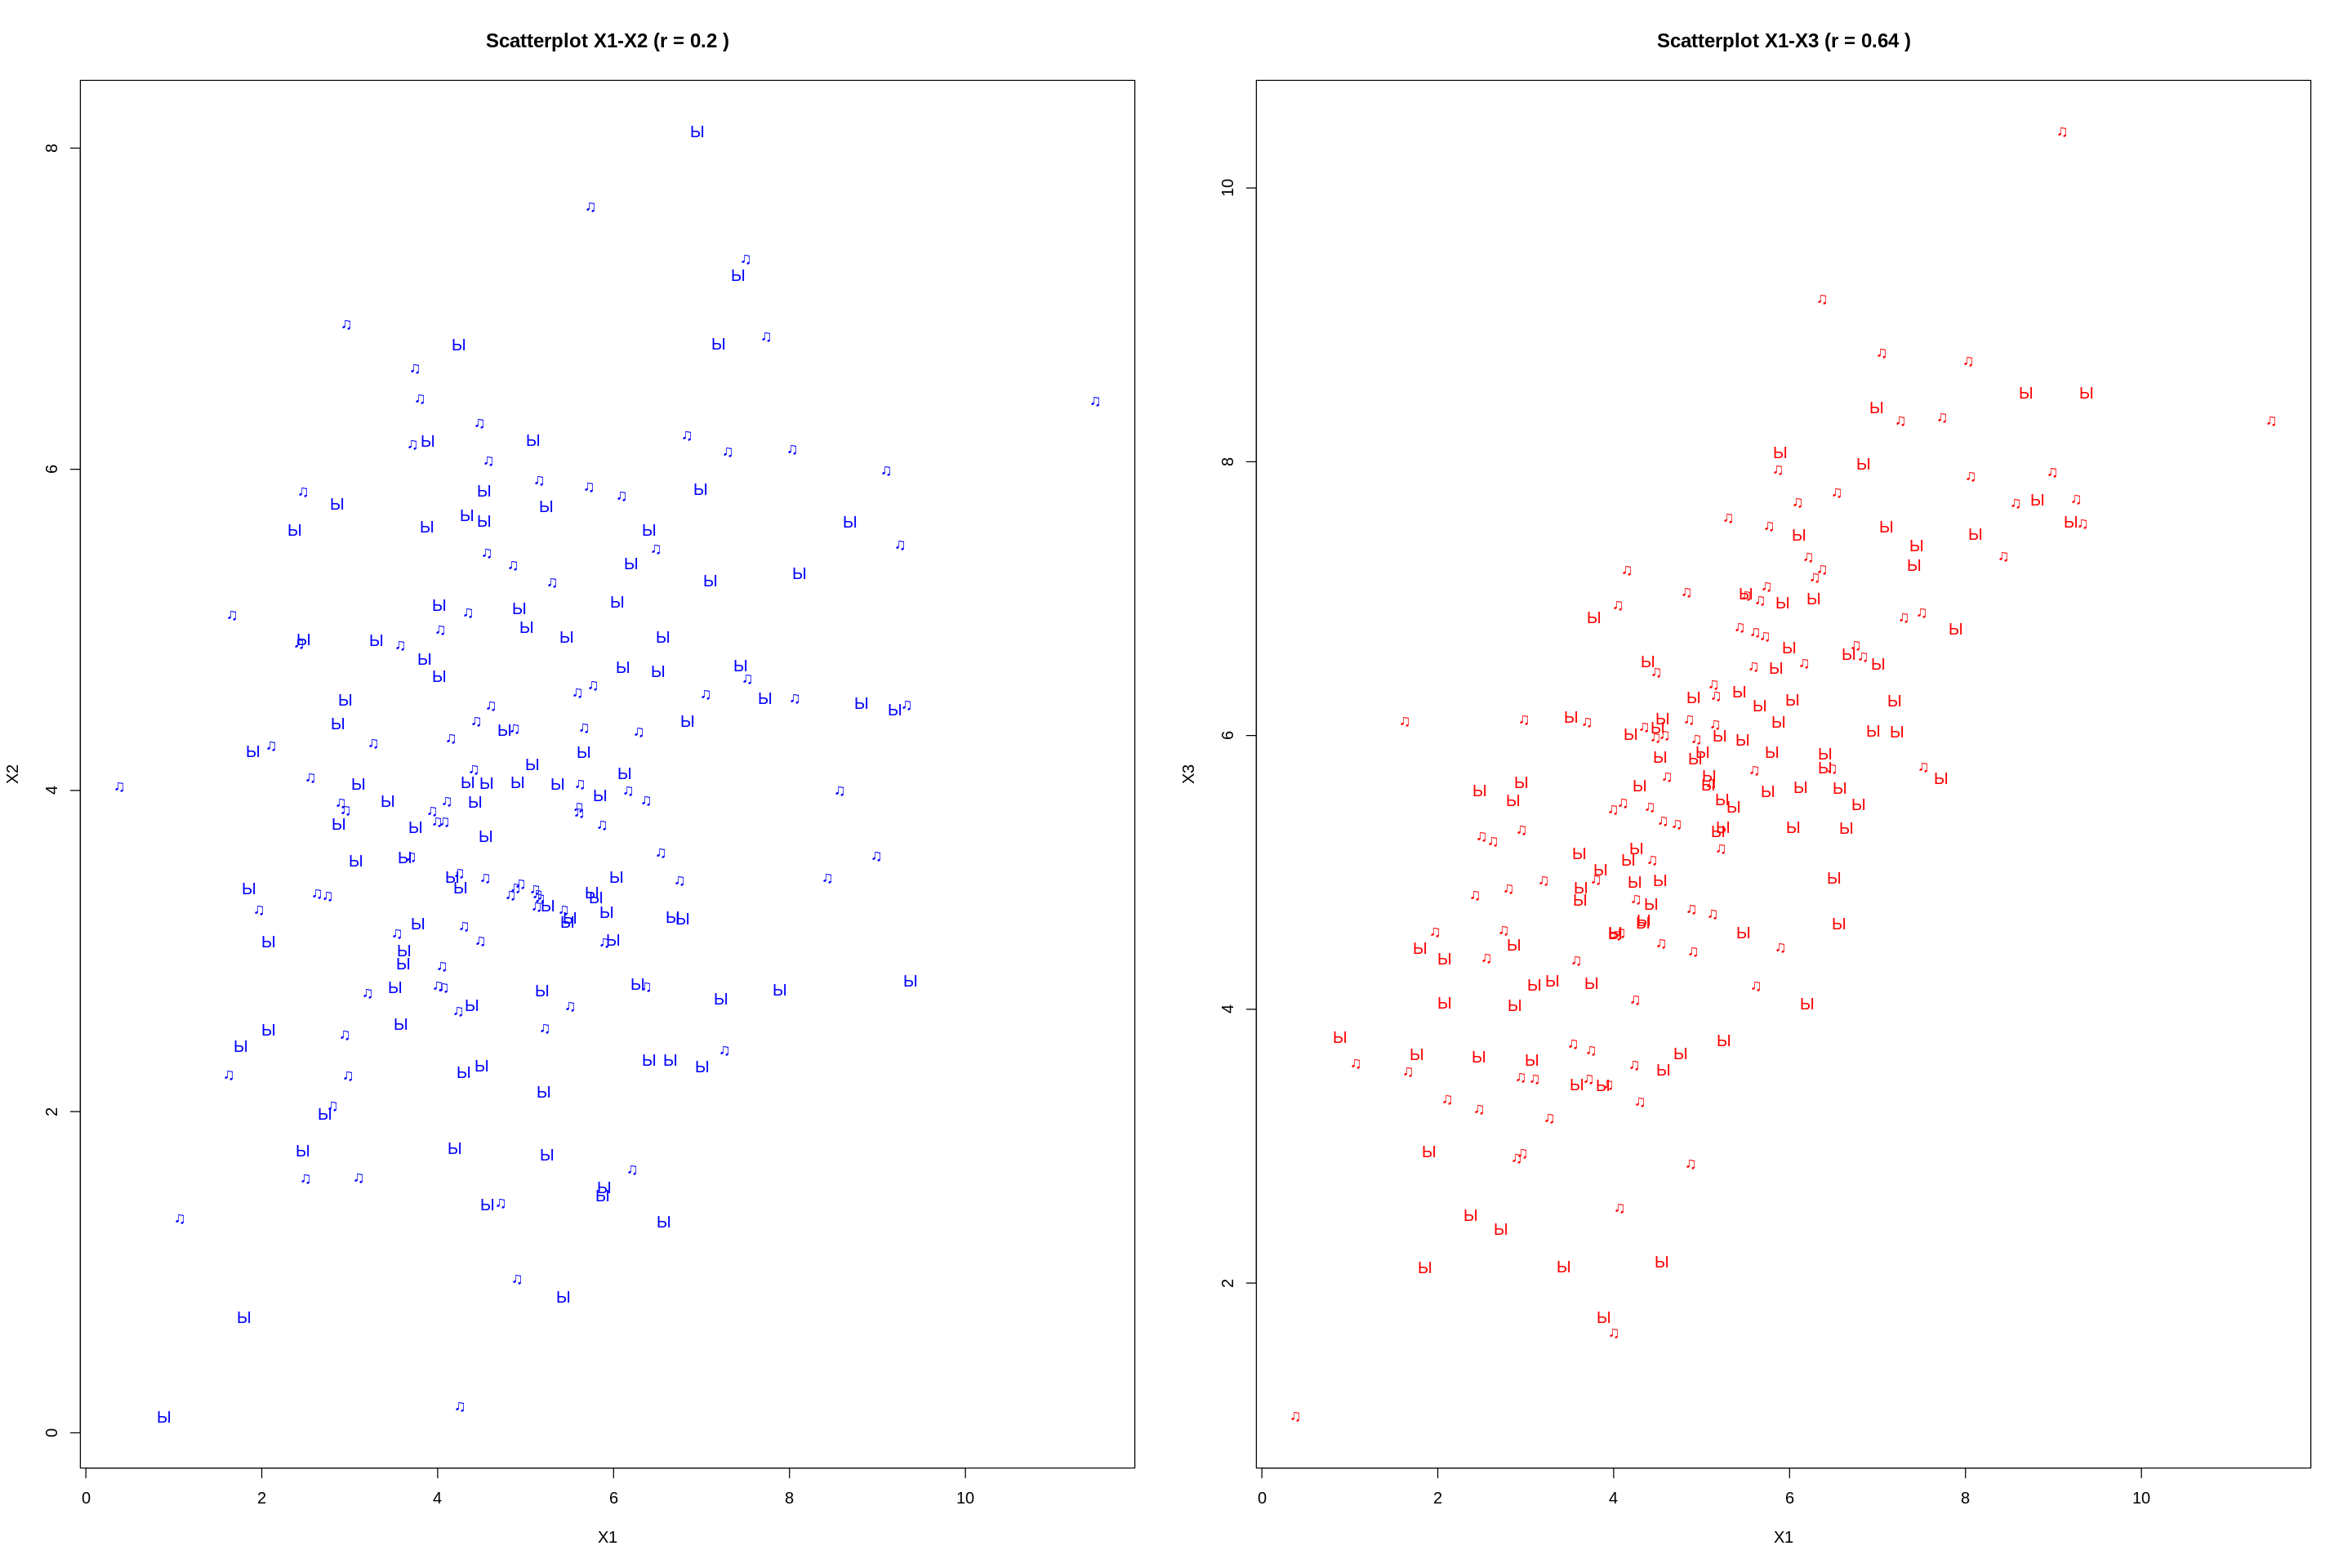

In [ ]:
# Задаем параметры
set.seed(123)  # Для воспроизводимости

N <- 200  # Объем выборки
a1 <- 5   # Среднее X1
S1 <- 2   # СКО X1

a2 <- 3   # Среднее X2, X3
S2 <- 1.5 # СКО X2, X3

# Генерируем X1 из нормального распределения
X1 <- rnorm(N, mean = a1, sd = S1)

# Задаем коэффициенты корреляции
r1 <- runif(1, 0.1, 0.2)  # случайное значение из [0.1, 0.2]
r2 <- runif(1, 0.6, 0.9)  # случайное значение из [0.6, 0.9]

# Генерируем X2 и X3 с заданной корреляцией
X2 <- r1 * X1 + sqrt(1 - r1^2) * rnorm(N, mean = a2, sd = S2)
X3 <- r2 * X1 + sqrt(1 - r2^2) * rnorm(N, mean = a2, sd = S2)

# Строим диаграммы рассеяния
options(repr.plot.width = 24, repr.plot.height = 16)
par(mfrow=c(1,2))  # Две графики в одной строке
plot(X1, X2, main = paste("Scatterplot X1-X2 (r =", round(r1, 2), ")"), col = "blue", pch = c("Ы", "♫"))
plot(X1, X3, main = paste("Scatterplot X1-X3 (r =", round(r2, 2), ")"), col = "red", pch = c("Ы", "♫"))

# Вычисляем выборочные коэффициенты корреляции
r1_hat <- cor(X1, X2)
r2_hat <- cor(X1, X3)

cat("Выборочные коэффициенты корреляции:\n")
cat("r1^ =", r1_hat, "\n")
cat("r2^ =", r2_hat, "\n")

# Расчет статистики Стьюдента
t1 <- r1_hat * sqrt((N - 2) / (1 - r1_hat^2))
t2 <- r2_hat * sqrt((N - 2) / (1 - r2_hat^2))

cat("\nСтатистики t-Стьюдента:\n")
cat("t1 =", t1, "\n")
cat("t2 =", t2, "\n")

# Проверка гипотезы о значимой корреляции
alpha = 0.05
gamma = 1 - (alpha / 2)
f = N - 2
t_critical = qt(gamma, f)

cat("|t1|=", t1, "; t_critical = ", t_critical, "\n")
cat("|t2|=", t2, "; t_critical = ", t_critical, "\n")


# Доверительный интервал с помощью Z-преобразования Фишера
Z1 <- 0.5 * log((1 + r1_hat) / (1 - r1_hat))
Z2 <- 0.5 * log((1 + r2_hat) / (1 - r2_hat))

alpha = 0.05
delta1 = (qnorm(1 - alpha/2)/sqrt(N - 3)) - (r1_hat)/(2*(N - 1))
delta2 = (qnorm(1 - alpha/2)/sqrt(N - 3)) - (r2_hat)/(2*(N - 1))

CI1 <- c((exp(Z1 - delta1) - exp(-(Z1 - delta1)))/(exp(Z1 - delta1) + exp(-(Z1 - delta1))), (exp(Z1 + delta1) - exp(-(Z1 + delta1)))/(exp(Z1 + delta1) + exp(-(Z1 + delta1))))
CI2 <- c((exp(Z2 - delta2) - exp(-(Z2 - delta2)))/(exp(Z2 - delta2) + exp(-(Z2 - delta2))), (exp(Z2 + delta2) - exp(-(Z2 + delta2)))/(exp(Z2 + delta2) + exp(-(Z2 + delta2))))

cat("\nДоверительный интервал для r1^:", CI1, "\n")
cat("Доверительный интервал для r2^:", CI2, "\n")
